In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px


In [3]:

def convert_to_date(x):
	return datetime.strptime(x, '%Y %m %d %H')

In [7]:
aq_df_sh = pd.read_csv('PRSA_Data_Shunyi_20130301-20170228.csv', parse_dates = [['year', 'month', 'day', 'hour']],date_parser=convert_to_date)

In [8]:
aq_df_wa = pd.read_csv('PRSA_Data_Wanliu_20130301-20170228.csv', parse_dates = [['year', 'month', 'day', 'hour']],date_parser=convert_to_date)

In [9]:
aq_df_gu = pd.read_csv('PRSA_Data_Gucheng_20130301-20170228.csv', parse_dates = [['year', 'month', 'day', 'hour']],date_parser=convert_to_date)

In [10]:
aq_df = pd.concat([aq_df_sh, aq_df_wa,aq_df_gu], ignore_index=True, sort=False)

In [11]:
aq_df

,year_month_day_hour,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2013-03-01 01:00:00,2,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,2013-03-01 02:00:00,3,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,2013-03-01 03:00:00,4,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,2013-03-01 04:00:00,5,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105187,2017-02-28 19:00:00,35060,14.0,58.0,4.0,19.0,500.0,56.0,12.8,1009.9,-17.0,0.0,NNW,3.1,Gucheng
105188,2017-02-28 20:00:00,35061,27.0,83.0,6.0,60.0,700.0,26.0,11.1,1010.4,-15.5,0.0,NW,1.9,Gucheng
105189,2017-02-28 21:00:00,35062,22.0,37.0,7.0,52.0,600.0,27.0,10.5,1010.8,-15.9,0.0,N,2.3,Gucheng
105190,2017-02-28 22:00:00,35063,9.0,23.0,3.0,13.0,400.0,57.0,8.9,1010.9,-14.9,0.0,NE,1.6,Gucheng


In [12]:
aq_df=aq_df.drop(['No'], axis=1)

In [13]:
aq_df

,year_month_day_hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2013-03-01 01:00:00,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,2013-03-01 02:00:00,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,2013-03-01 03:00:00,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,2013-03-01 04:00:00,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105187,2017-02-28 19:00:00,14.0,58.0,4.0,19.0,500.0,56.0,12.8,1009.9,-17.0,0.0,NNW,3.1,Gucheng
105188,2017-02-28 20:00:00,27.0,83.0,6.0,60.0,700.0,26.0,11.1,1010.4,-15.5,0.0,NW,1.9,Gucheng
105189,2017-02-28 21:00:00,22.0,37.0,7.0,52.0,600.0,27.0,10.5,1010.8,-15.9,0.0,N,2.3,Gucheng
105190,2017-02-28 22:00:00,9.0,23.0,3.0,13.0,400.0,57.0,8.9,1010.9,-14.9,0.0,NE,1.6,Gucheng


In [14]:
aq_df = aq_df.set_index('year_month_day_hour').groupby('station').resample('D').mean()

In [15]:
aq_df

PM2.5        PM10        SO2        NO2  \
station year_month_day_hour                                                 
Gucheng 2013-03-01             8.625000   16.875000   7.391304  14.250000   
        2013-03-02            36.916667   51.375000  37.291667  37.565217   
        2013-03-03            80.333333  120.041667  47.541667  63.333333   
        2013-03-04            26.500000   51.291667  18.666667  32.666667   
        2013-03-05           136.708333  172.541667  75.130435  73.500000   
...                                 ...         ...        ...        ...   
Wanliu  2017-02-24            21.458333   39.666667   8.750000  55.875000   
        2017-02-25             8.250000   21.166667   6.375000  36.916667   
        2017-02-26            27.125000   44.583333  14.250000  69.916667   
        2017-02-27            64.000000   95.916667  17.869565  89.826087   
        2017-02-28             9.958333   25.583333   7.458333  40.916667   

                                      CO         O3       TEMP         PRES  \
station year_month_day_hour                                                   
Gucheng 2013-03-01            869.565217  77.130435   1.691667  1024.816667   
        2013-03-02           1479.041667  39.583333   0.820833  1024.900000   
        2013-03-03           2349.708333  33.708333   6.562500  1012.566667   
        2013-03-04           1170.666667  67.250000   9.795833  1015.608333   
        2013-03-05           1381.545455  84.375000   6.750000  1008.883333   
...                                  ...        ...        ...          ...   
Wanliu  2017-02-24            837.500000  38.583333   4.395833  1019.466667   
        2017-02-25            491.666667  56.375000   6.387500  1017.287500   
        2017-02-26            887.500000  30.250000   6.720833  1018.758333   
        2017-02-27           1643.478261  17.136364   7.220833  1015.554167   
        2017-02-28            479.166667  54.791667  10.516667  1013.345833   

                                  DEWP  RAIN      WSPM  
station year_month_day_hour                             
Gucheng 2013-03-01          -19.691667   0.0  2.350000  
        2013-03-02          -16.337500   0.0  1.087500  
        2013-03-03          -11.991667   0.0  1.400000  
        2013-03-04          -11.945833   0.0  1.541667  
        2013-03-05           -7.741667   0.0  0.841667  
...                                ...   ...       ...  
Wanliu  2017-02-24          -10.583333   0.0  1.262500  
        2017-02-25           -9.900000   0.0  1.466667  
        2017-02-26           -7.558333   0.0  1.562500  
        2017-02-27           -6.333333   0.0  1.316667  
        2017-02-28          -12.266667   0.0  1.800000  

[4383 rows x 11 columns]

In [16]:
aq_df=aq_df.reset_index()

<AxesSubplot:xlabel='year_month_day_hour'>

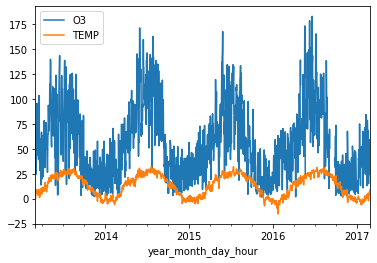

In [17]:

aq_df.set_index('year_month_day_hour').query("station=='Shunyi'")[['O3','TEMP']].plot()

<AxesSubplot:xlabel='year_month_day_hour'>

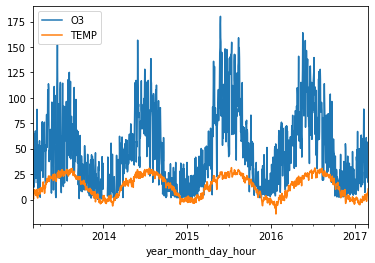

In [18]:
aq_df.set_index('year_month_day_hour').query("station=='Wanliu'")[['O3','TEMP']].plot()

<AxesSubplot:xlabel='year_month_day_hour'>

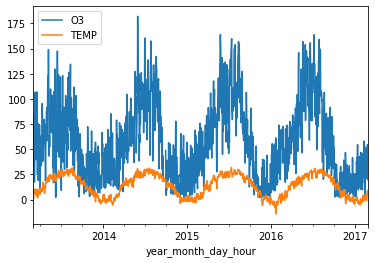

In [19]:
aq_df.set_index('year_month_day_hour').query("station=='Gucheng'")[['O3','TEMP']].plot()

station
Gucheng    AxesSubplot(0.125,0.125;0.775x0.755)
Shunyi     AxesSubplot(0.125,0.125;0.775x0.755)
Wanliu     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

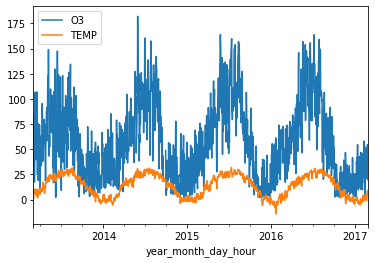

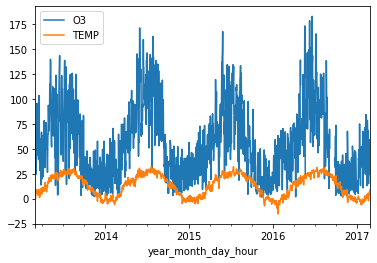

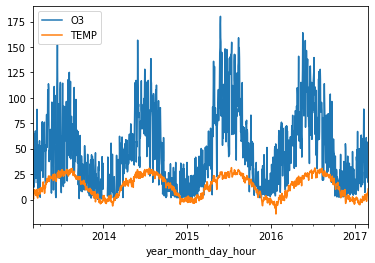

In [20]:

aq_df.set_index('year_month_day_hour').groupby('station')[['O3','TEMP']].plot()

In [21]:
aq_df

,station,year_month_day_hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,Gucheng,2013-03-01,8.625000,16.875000,7.391304,14.250000,869.565217,77.130435,1.691667,1024.816667,-19.691667,0.0,2.350000
1,Gucheng,2013-03-02,36.916667,51.375000,37.291667,37.565217,1479.041667,39.583333,0.820833,1024.900000,-16.337500,0.0,1.087500
2,Gucheng,2013-03-03,80.333333,120.041667,47.541667,63.333333,2349.708333,33.708333,6.562500,1012.566667,-11.991667,0.0,1.400000
3,Gucheng,2013-03-04,26.500000,51.291667,18.666667,32.666667,1170.666667,67.250000,9.795833,1015.608333,-11.945833,0.0,1.541667
4,Gucheng,2013-03-05,136.708333,172.541667,75.130435,73.500000,1381.545455,84.375000,6.750000,1008.883333,-7.741667,0.0,0.841667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4378,Wanliu,2017-02-24,21.458333,39.666667,8.750000,55.875000,837.500000,38.583333,4.395833,1019.466667,-10.583333,0.0,1.262500
4379,Wanliu,2017-02-25,8.250000,21.166667,6.375000,36.916667,491.666667,56.375000,6.387500,1017.287500,-9.900000,0.0,1.466667
4380,Wanliu,2017-02-26,27.125000,44.583333,14.250000,69.916667,887.500000,30.250000,6.720833,1018.758333,-7.558333,0.0,1.562500
4381,Wanliu,2017-02-27,64.000000,95.916667,17.869565,89.826087,1643.478261,17.136364,7.220833,1015.554167,-6.333333,0.0,1.316667


In [22]:
aq_df['station'].unique()

array(['Gucheng', 'Shunyi', 'Wanliu'], dtype=object)

In [23]:

from fbprophet import Prophet

In [24]:
aq_df_final=aq_df[['year_month_day_hour','O3','TEMP','station']].rename({'year_month_day_hour':'ds','O3':'y'}, axis='columns')

In [25]:
aq_df_final

,ds,y,TEMP,station
0,2013-03-01,77.130435,1.691667,Gucheng
1,2013-03-02,39.583333,0.820833,Gucheng
2,2013-03-03,33.708333,6.562500,Gucheng
3,2013-03-04,67.250000,9.795833,Gucheng
4,2013-03-05,84.375000,6.750000,Gucheng
...,...,...,...,...
4378,2017-02-24,38.583333,4.395833,Wanliu
4379,2017-02-25,56.375000,6.387500,Wanliu
4380,2017-02-26,30.250000,6.720833,Wanliu
4381,2017-02-27,17.136364,7.220833,Wanliu


In [26]:
stations = aq_df_final.groupby('station')

In [27]:
stations.head()

,ds,y,TEMP,station
0,2013-03-01,77.130435,1.691667,Gucheng
1,2013-03-02,39.583333,0.820833,Gucheng
2,2013-03-03,33.708333,6.562500,Gucheng
3,2013-03-04,67.250000,9.795833,Gucheng
4,2013-03-05,84.375000,6.750000,Gucheng
1461,2013-03-01,62.478261,0.541667,Shunyi
1462,2013-03-02,40.416667,0.083333,Shunyi
1463,2013-03-03,24.541667,5.029167,Shunyi
1464,2013-03-04,55.125000,8.937500,Shunyi
1465,2013-03-05,74.541667,6.450000,Shunyi


In [28]:

for station in stations.groups:
    group = stations.get_group(station)
    train=group[(group['ds'] >= '2013-03-01') & (group['ds'] <= '2016-02-28')]
    test=group[(group['ds'] > '2016-02-28')]
    print(test.shape)

(366, 4)
(366, 4)
(366, 4)


In [29]:
target = pd.DataFrame()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


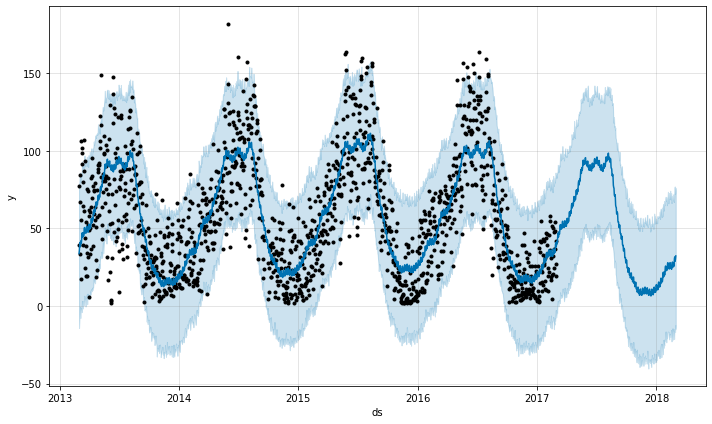

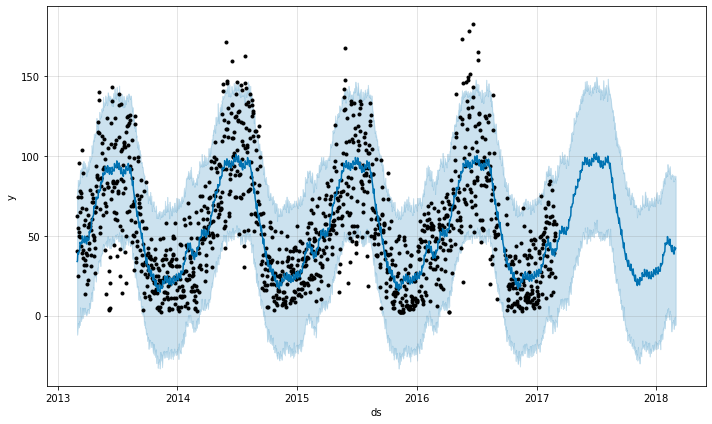

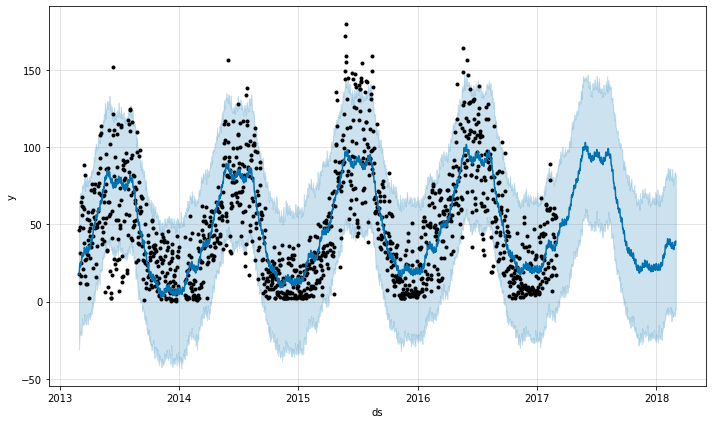

In [30]:
for station in stations.groups:
    group = stations.get_group(station)
    
    m = Prophet(interval_width=0.95)
    m.fit(group)
    future = m.make_future_dataframe(periods=366)
    forecast = m.predict(future)  
    m.plot(forecast)  
    forecast = forecast.rename(columns={'yhat': 'yhat_'+station})
    target = pd.merge(target, forecast.set_index('ds'), how='outer', left_index=True, right_index=True)

In [31]:
target


,trend_x,yhat_lower_x,yhat_upper_x,trend_lower_x,trend_upper_x,additive_terms_x,additive_terms_lower_x,additive_terms_upper_x,weekly_x,weekly_lower_x,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat_Wanliu
ds,,,,,,,,,,,,,,,,,,,,,
2013-03-01,49.023284,-14.145814,78.909555,49.023284,49.023284,-15.163033,-15.163033,-15.163033,-1.941013,-1.941013,...,-1.924431,-1.924431,-1.924431,-17.370069,-17.370069,-17.370069,0.0,0.0,0.0,17.666978
2013-03-02,49.039947,-9.246050,79.569832,49.039947,49.039947,-13.098040,-13.098040,-13.098040,-0.800944,-0.800944,...,-0.470058,-0.470058,-0.470058,-16.496676,-16.496676,-16.496676,0.0,0.0,0.0,20.007029
2013-03-03,49.056610,-0.468446,85.947843,49.056610,49.056610,-9.334434,-9.334434,-9.334434,2.014311,2.014311,...,2.406752,2.406752,2.406752,-15.562577,-15.562577,-15.562577,0.0,0.0,0.0,23.830223
2013-03-04,49.073272,-2.746502,86.083573,49.073272,49.073272,-8.083419,-8.083419,-8.083419,2.304884,2.304884,...,1.929884,1.929884,1.929884,-14.583016,-14.583016,-14.583016,0.0,0.0,0.0,24.345201
2013-03-05,49.089935,-7.709724,80.036082,49.089935,49.089935,-10.712549,-10.712549,-10.712549,-1.285160,-1.285160,...,-0.940908,-0.940908,-0.940908,-13.574225,-13.574225,-13.574225,0.0,0.0,0.0,22.495485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-25,45.354665,-14.748795,76.505045,42.867279,47.874169,-14.644584,-14.644584,-14.644584,2.014311,2.014311,...,2.406752,2.406752,2.406752,-20.119874,-20.119874,-20.119874,0.0,0.0,0.0,38.660443
2018-02-26,45.332263,-14.922680,77.099255,42.839382,47.858487,-13.637192,-13.637192,-13.637192,2.304884,2.304884,...,1.929884,1.929884,1.929884,-19.634943,-19.634943,-19.634943,0.0,0.0,0.0,38.671792
2018-02-27,45.309860,-16.767552,72.369006,42.811486,47.842805,-16.448160,-16.448160,-16.448160,-1.285160,-1.285160,...,-0.940908,-0.940908,-0.940908,-19.044540,-19.044540,-19.044540,0.0,0.0,0.0,36.394690


In [32]:
target = target[['yhat_' + station for station in stations.groups.keys()]]

In [33]:
target

,yhat_Gucheng,yhat_Shunyi,yhat_Wanliu
ds,,,
2013-03-01,33.860251,33.883649,17.666978
2013-03-02,35.941907,34.220287,20.007029
2013-03-03,39.722176,39.381665,23.830223
2013-03-04,40.989854,38.852346,24.345201
2013-03-05,38.377386,38.503407,22.495485
...,...,...,...
2018-02-25,30.710081,43.039709,38.660443
2018-02-26,31.695071,41.936177,38.671792
2018-02-27,28.861700,41.091310,36.394690


<AxesSubplot:xlabel='ds'>

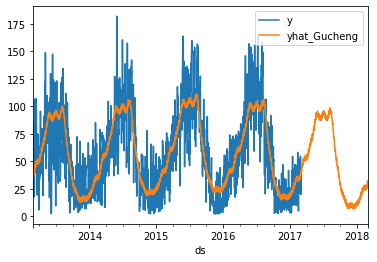

In [34]:
pd.concat([aq_df_final.set_index('ds').query("station=='Gucheng'")['y'],target['yhat_Gucheng']],axis=1).plot()

<AxesSubplot:xlabel='ds'>

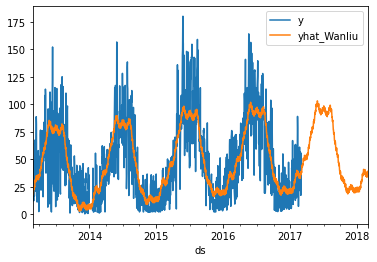

In [35]:
pd.concat([aq_df_final.set_index('ds').query("station=='Wanliu'")['y'],target['yhat_Wanliu']],axis=1).plot()